In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

## Group Assignment
### Team Number: 16
### Team Member Names: Stephen Chen, Bhavya Shah, Alex Liu
### Team Strategy Chosen: RISKY

In [2]:
# Importing csv file with tickers and reformatting dataframe
ticker_list = pd.read_csv("Tickers.csv")
add_columns = pd.DataFrame({ticker_list.columns[0]:ticker_list.columns[0]}, index=[len(ticker_list)])
ticker_list = ticker_list.append(add_columns)
ticker_list.columns=['Tickers']

In [3]:
# Dropping duplicate tickers and resetting index
ticker_list = pd.DataFrame ({'Tickers': ticker_list.Tickers.drop_duplicates()})
ticker_list.reset_index(inplace=True)
ticker_list = ticker_list.iloc[: , 1:]

In [4]:
# displaying the list of tickers
ticker_list

,Tickers
0,ABBV
1,ABT
2,ACN
3,AGN
4,AIG
...,...
57,UNH
58,UNP
59,UPS
60,USB


In [5]:
# identifying non-American stocks, converting tickers to American (if possible)
for i in range(0, len(ticker_list)):
    ticker = str(ticker_list.iloc[i, 0])
    
    # finds the period in the stock tickers
    get_position = ticker.find('.')
    
    # if there is a period in the string (meaning that it's not an American stock)
    if (get_position != -1):
        ticker_list.iloc[i, 0] = ticker[:get_position]

In [6]:
sector_list = pd.DataFrame(columns = ['Sectors'])

# function that determines the standard deviation of each stock
def get_deviation(ticker):
    stock_ticker = ticker
    stock_hist = stock_ticker.history(start='2018-01-01', end='2021-11-19')
    stock_close = stock_hist['Close']
    
    # grouping Close prices by months
    stock_close.index = pd.to_datetime(stock_close.index)
    monthly_close = stock_close.groupby(stock_close.index.to_period('m')).head(1)

    # returning the standard deviation based off of percent change
    return (monthly_close.pct_change()*100).std()

i = 0

# For loop to find the standard deviation of all the stocks in ticker list
for i in range (len(ticker_list)):
    stock = yf.Ticker(ticker_list.iloc[i, 0])
    sector = stock.info.get('sector')
    add_data = pd.DataFrame({'Sectors':sector,
                             'Standard Deviation': get_deviation(stock)},index=[i])
    sector_list = sector_list.append(add_data)



- AGN: No data found, symbol may be delisted
- CELG: No data found, symbol may be delisted
- PCLN: No data found for this date range, symbol may be delisted
- RTN: No data found, symbol may be delisted


In [7]:
sector_list

,Sectors,Standard Deviation
0,Healthcare,8.569739
1,Healthcare,6.070936
2,Technology,6.994099
3,None,NaN
4,Financial Services,12.029141
...,...,...
57,Healthcare,7.253478
58,Industrials,7.524285
59,Industrials,9.225229
60,Financial Services,8.331631


In [8]:
# Concatenating ticker list to standard deviation list
ticker_list = pd.concat([ticker_list, sector_list], join='inner',axis=1)

In [9]:
# Removing stocks without sectors
ticker_list = ticker_list[ticker_list.Sectors.notnull()]
ticker_list.set_index('Sectors', inplace=True)

In [10]:
# Outputting ticker list with standard deviation list
ticker_list

,Tickers,Standard Deviation
Sectors,,
Healthcare,ABBV,8.569739
Healthcare,ABT,6.070936
Technology,ACN,6.994099
Financial Services,AIG,12.029141
Consumer Cyclical,AMZN,8.187451
Financial Services,AXP,8.920671
Industrials,BA,13.633314
Financial Services,BAC,9.501078
Healthcare,BIIB,11.080848


In [11]:
# dropping stocks that have insufficient data

# creating a duplicate ticker list to transform
duplicate_list = ticker_list.copy()

# resetting the index of the duplicate list
duplicate_list.reset_index(inplace=True)

# list of indices to drop later
drop = []

In [12]:
# Apple is a company that has sufficient stock information. We use Apple as a reference for how many entries of information a stock should have.

# getting the ticker, history and close price information of Apple
apple = yf.Ticker('AAPL')
apple_hist = apple.history(start="2018-01-01", end="2021-11-19")
apple_close = apple_hist['Close']

# getting the length of the Close Price of Apple Dataframe (this is how much data should be in each dataframe)
desired_length = len(apple_close)

In [13]:
# for-loop to check each stock to see if they have a sufficient amount of data
for i in range (0, len(ticker_list)):
    
    # getting the ticker, ticker history and close price information of each stock.
    ticker = yf.Ticker(ticker_list.iloc[i, 0])
    t_hist = ticker.history(start="2018-01-01", end="2021-11-19")
    ticker_close = t_hist['Close']
    
    # if there is an insufficient amount of data, append to the list of indices to be dropped
    if (len(ticker_close) != desired_length):
        drop.append(duplicate_list.index[i])

In [14]:
# dropping the stocks with an insufficient amount of information
duplicate_list.drop(drop, inplace=True)

# re-indexing and re-formatting the duplicate dataframe
duplicate_list.index = duplicate_list['Sectors']
duplicate_list.drop(columns=['Sectors'], inplace=True)

# removing the undesired stocks from the ticker list
ticker_list = duplicate_list

In [15]:
# displaying the ticker list
ticker_list

,Tickers,Standard Deviation
Sectors,,
Healthcare,ABBV,8.569739
Healthcare,ABT,6.070936
Technology,ACN,6.994099
Financial Services,AIG,12.029141
Consumer Cyclical,AMZN,8.187451
Financial Services,AXP,8.920671
Industrials,BA,13.633314
Financial Services,BAC,9.501078
Healthcare,BIIB,11.080848


In [16]:
# placeholder volume column
ticker_list["Volume"] = None

# loop to calculate the average daily volume of each stock
for i in range (0, len(ticker_list)):
    
    # getting the number of days between June 2, 2021 and October 22, 2021
    num_days = int(str(pd.to_datetime('2021-07-02') - pd.to_datetime('2021-10-22'))[1:4])
    
    # getting each ticker's information
    ticker = yf.Ticker(ticker_list.iloc[i, 0])
    ticker_hist = ticker.history(start="2021-07-02", end="2021-10-22")
    ticker_volume = ticker_hist['Volume'].sum()/num_days
    ticker_list.iloc[i, -1] = ticker_volume
    
# filtering for the tickers that fit our requirement
ticker_list = ticker_list[(ticker_list["Volume"] >= 10000)]

In [17]:
# Filtering for each sector and sorting each sector from highest to lowest standard deviation 
def sort_list (industry_list, industry):
    industry_list = ticker_list.filter(like = industry, axis=0)
    industry_list = industry_list.sort_values(by=['Standard Deviation'], ascending = False)
    return industry_list
    

In [18]:
energy_list = sort_list (ticker_list, 'Energy')
energy_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Energy,OXY,19.543815,11707057.142857
Energy,SLB,15.023794,7528641.964286
Energy,COP,12.924563,6067660.714286
Energy,KMI,8.874310,9776673.214286


In [19]:
financial_list = sort_list (ticker_list, 'Financial Services') 
financial_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Financial Services,COF,12.107918,1965058.035714
Financial Services,AIG,12.029141,2983665.178571
Financial Services,C,11.555252,12883508.928571
Financial Services,MS,9.995934,5997000.892857
Financial Services,BAC,9.501078,33489260.714286
Financial Services,PYPL,9.442428,4678679.464286
Financial Services,AXP,8.920671,2532703.571429
Financial Services,USB,8.331631,3711789.285714
Financial Services,JPM,8.063898,7968159.821429


In [20]:
tech_list = sort_list (ticker_list, 'Technology')
tech_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Technology,SHOP,14.632376,691973.214286
Technology,QCOM,12.599123,4954920.535714
Technology,AAPL,10.091369,55696846.428571
Technology,CSCO,7.768640,10937365.178571
Technology,ACN,6.994099,1248614.285714
Technology,TXN,6.685049,2425787.5
Technology,MSFT,6.305217,15980571.428571
Technology,ORCL,5.821712,7671951.785714


In [21]:
healthcare_list = sort_list (ticker_list, 'Healthcare')
healthcare_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Healthcare,BIIB,11.080848,752603.571429
Healthcare,ABBV,8.569739,4826476.785714
Healthcare,CVS,7.779541,3637359.821429
Healthcare,LLY,7.440416,1768306.25
Healthcare,UNH,7.253478,1778942.857143
Healthcare,PFE,6.712639,21327650.892857
Healthcare,ABT,6.070936,3254866.964286
Healthcare,BMY,5.935182,6440792.857143
Healthcare,MRK,5.166594,8697586.607143


In [22]:
estate_list = sort_list (ticker_list, 'Real Estate')
estate_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Real Estate,SPG,13.402588,1387918.75


In [23]:
industry_list = sort_list (ticker_list, 'Industrials')
industry_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Industrials,BA,13.633314,6776169.642857
Industrials,CAT,8.394303,2384585.714286
Industrials,UNP,7.524285,2148769.642857
Industrials,LMT,6.520709,787491.964286


In [24]:
utilities_list = sort_list(ticker_list, 'Utilities')
utilities_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Utilities,SO,6.14726,2736672.321429
Utilities,NEE,5.72065,4644516.964286


In [25]:
communication_list = sort_list(ticker_list,'Communication Services')
communication_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Communication Services,GOOG,7.670060,723633.035714
Communication Services,CMCSA,7.578767,10583018.75
Communication Services,T,5.640447,24657718.75


In [26]:
materials_list = sort_list(ticker_list,'Basic Materials')
materials_list

,Tickers,Standard Deviation,Volume
Sectors,,,


In [27]:
consumer_list = sort_list(ticker_list,'Consumer Defensive')
consumer_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Consumer Defensive,TGT,8.669339,2036626.785714
Consumer Defensive,PM,7.570634,2618207.142857
Consumer Defensive,MO,6.760152,4468792.857143
Consumer Defensive,KO,5.638519,9514454.464286
Consumer Defensive,COST,5.091330,1203228.571429
Consumer Defensive,PEP,5.026444,2789961.607143
Consumer Defensive,CL,4.817024,2655066.071429
Consumer Defensive,PG,4.376677,4636135.714286


In [28]:
cyclical_list = sort_list(ticker_list,'Consumer Cyclical')
cyclical_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Consumer Cyclical,GM,12.174480,11848326.785714
Consumer Cyclical,AMZN,8.187451,2211843.75
Consumer Cyclical,SBUX,7.669894,3825971.428571
Consumer Cyclical,NKE,7.364820,4249422.321429


In [29]:
# getting the list of the sectors
sectors_list = [energy_list, financial_list, tech_list, healthcare_list, estate_list, industry_list, utilities_list, communication_list, materials_list, consumer_list]

In [30]:
# find the sector with the highest standard deviation
def find_highest_sector_deviation(list_of_sectors):
    
    sector_deviation = []
    
    # list of sectors isn't empty
    if (len(list_of_sectors) != 0):
        
        # temporary variables for the highest deviation, along with the sector with the highest deviation
        highest_deviation = -100000000
        highest_deviation_sector = None
    
        # for-loop which loops through each sector
        for i in range (0, len(list_of_sectors)):
    
            # temporary dataframe to store values
            temp = pd.DataFrame()
    
            # dataframe with each stock in a specific sector
            sector = list_of_sectors[i]
            
            # getting the average deviation of each stock/standard deviation of the sector
            temp_deviation = sector['Standard Deviation'].sum()/len(sector)
    
            # determining if that sector has the highest deviation or not, if it is, change the values
            if (temp_deviation > highest_deviation):
                highest_deviation = temp_deviation
                highest_deviation_sector = sector
                
            sector_deviation.append([sector.index[0], temp_deviation])
        
        # return the sector with the highest deviation
        return highest_deviation_sector, sector_deviation
    
    # list of sectors is empty
    else:
        
        # return 0
        return 0

In [31]:
# filter out sectors without any stocks
filtered_sectors_list = []

# for-loop to get rid of any sectors without any stocks in them (lowers run-time)
for i in range (0, len(sectors_list)):
    
    # if the sector list isn't empty, add the sector to the filtered list
    if (len(sectors_list[i]) != 0):
        filtered_sectors_list.append(sectors_list[i])

In [32]:
high_deviation_sector = find_highest_sector_deviation(filtered_sectors_list)[0]
high_deviation_sector

,Tickers,Standard Deviation,Volume
Sectors,,,
Energy,OXY,19.543815,11707057.142857
Energy,SLB,15.023794,7528641.964286
Energy,COP,12.924563,6067660.714286
Energy,KMI,8.874310,9776673.214286


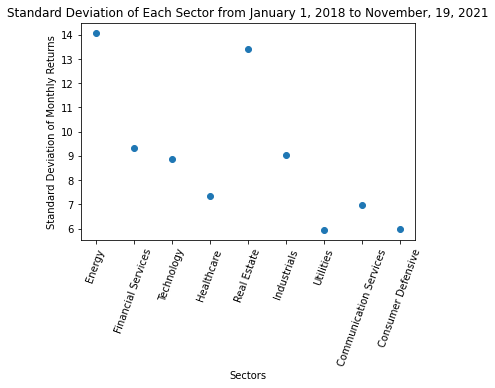

In [33]:
# getting the standard deviation information for each sector
sector_deviation = find_highest_sector_deviation(filtered_sectors_list)[1]

# creating a scatterplot with the data points for standard deviation
plt.scatter(*zip(*sector_deviation))

# formatting the graph
plt.title('Standard Deviation of Each Sector from January 1, 2018 to November, 19, 2021')
plt.xlabel('Sectors')
plt.ylabel('Standard Deviation of Monthly Returns')
plt.xticks(rotation=70)

# displaying the graph
plt.show()

Our methodology behind creating a risky portfolio revolves around finding the riskiest sectors that are correlated to each other and limiting both the inter-industry diversification and individual stocks diversification. To limit the amount of inter-industry diversification, we first grouped the stocks based on their sector. After grouping the stocks by sector, we needed to sort the sectors based on risk, so that we can prioritize the sector with the highest risk when forming our portfolio. To accomplish this, we calculated the standard deviation of each sector, which can be seen from the graph above. We decided to use 2018-01-01 to 2021-11-19 as the time period, as the data is recent enough to revelant, while at the same time provides a large enough sample size to which we can make accurate assumptions. We used standard deviation instead of beta as standard deviation measures the unconditional risk of returns, while beta measures conditional risk. To expand, standard deviation measures the volatility of a stock, by calculating the degree to which the stock fluctuates from its mean return, while beta compares the risk to that of the overall market, or another benchmark. In this case, we were more interested in how much the stocks themselves fluctuate, as opposed to how they compare to the market, so we chose standard deviation. Now, we can use the sectors and standard deviation for the stocks to help create a risky portfolio later on. 

In [34]:
# Removes the sector with the highest standard deviation for the sector list
new_filtered = []

for i in range (0, len(filtered_sectors_list)):
    if (filtered_sectors_list[i].index[0] != high_deviation_sector.index[0]):
        new_filtered.append(filtered_sectors_list[i])

new_filtered

[                   Tickers  Standard Deviation           Volume
 Sectors                                                        
 Financial Services     COF           12.107918   1965058.035714
 Financial Services     AIG           12.029141   2983665.178571
 Financial Services       C           11.555252  12883508.928571
 Financial Services      MS            9.995934   5997000.892857
 Financial Services     BAC            9.501078  33489260.714286
 Financial Services    PYPL            9.442428   4678679.464286
 Financial Services     AXP            8.920671   2532703.571429
 Financial Services     USB            8.331631   3711789.285714
 Financial Services     JPM            8.063898   7968159.821429
 Financial Services     BLK            7.788556        362068.75
 Financial Services      BK            7.329313   3396391.964286
 Financial Services      TD            7.024688       1057731.25,
            Tickers  Standard Deviation           Volume
 Sectors                        

In [35]:
def get_correlations(sector, sector_list):
    
    # creating temporary lists to transform later
    returned_list = [sector]
    correlation_list = []
    
    # creating an empty dataframe for now
    sector_df = pd.DataFrame()
    
    # filling up the sector monthly returns
    for i in range (0, len(sector)):
        
        # getting ticker name, ticker history, weighted close price
        sector_ticker = yf.Ticker(sector.iloc[i, 0])
        sector_history = sector_ticker.history(start='2018-01-01', end='2021-11-19')
        sector_close_price = sector_history['Close']
        
        # converting to monthly data
        sector_close_price.index = pd.to_datetime(sector_close_price.index)
        sector_monthly_close_price = sector_close_price.groupby(sector_close_price.index.to_period('m')).head(1)
        sector_df['Monthly Close Price of ' + sector.iloc[i,0]] = sector_monthly_close_price
        
    # calculating value of sector (as if it were a portfolio), monthly returns and standard deviation
    sector_df['Value of Sector'] = sector_df.sum(axis=1)
    sector_df['Monthly Returns'] = sector_df['Value of Sector'].pct_change()*100
    sector_df = sector_df['Monthly Returns']
        
    # getting the correlations of the rest of the sectors
    for j in range (0, len(sector_list)):
        
        # temporary dataframe to store values
        temp = pd.DataFrame()
        correlation = pd.DataFrame()
    
        # dataframe with each stock in a specific sector
        init_sector = sector_list[j]
    
        # for-loop for each stock in a sector
        for k in range (0, len(init_sector)):
            # getting ticker name, ticker history, weighted close price
            ticker = yf.Ticker(init_sector.iloc[k, 0])
            history = ticker.history(start='2018-01-01', end='2021-11-19')
            close_price = history['Close']
            
            # converting to monthly data
            close_price.index = pd.to_datetime(close_price.index)
            monthly_close = close_price.groupby(close_price.index.to_period('m')).head(1)
            
            temp['Monthly Close Price of ' + init_sector.iloc[k,0]] = monthly_close
                
        # calculating value of sector (as if it were a portfolio), monthly returns and standard deviation
        temp['Value of Sector'] =  temp.sum(axis=1)
        temp['Monthly Returns'] = temp['Value of Sector'].pct_change()*100
        temp = temp['Monthly Returns']
        
        # concatenating the sector dataframe along with the dataframe of the other sector
        combined = pd.concat([sector_df, temp], join='inner', axis=1)
        
        # calculating the correlation and extracting the correlation
        correlation = combined.corr().iloc[0, 1]
        
        # appending the correlation, along with the sector name to a list
        correlation_list.append([init_sector.index[0], correlation, sector_list[j]])
    
    # sorting the list with the sectors and correlation information from greatest to least
    correlation_list.sort(key=lambda x: x[1], reverse=True)
    
    # appending the sectors with the highest correlations to a separate list
    for l in range (0, len(correlation_list)):
        correlation_sector = correlation_list[l]
        returned_list.append(correlation_sector[2])
    
    # returning the data
    return returned_list

In [36]:
# list with sectors in an descending correlative order
list_of_corr = (get_correlations(high_deviation_sector, new_filtered))

# displaying the list
list_of_corr

[        Tickers  Standard Deviation           Volume
 Sectors                                             
 Energy      OXY           19.543815  11707057.142857
 Energy      SLB           15.023794   7528641.964286
 Energy      COP           12.924563   6067660.714286
 Energy      KMI            8.874310   9776673.214286,
             Tickers  Standard Deviation      Volume
 Sectors                                            
 Real Estate     SPG           13.402588  1387918.75,
                    Tickers  Standard Deviation           Volume
 Sectors                                                        
 Financial Services     COF           12.107918   1965058.035714
 Financial Services     AIG           12.029141   2983665.178571
 Financial Services       C           11.555252  12883508.928571
 Financial Services      MS            9.995934   5997000.892857
 Financial Services     BAC            9.501078  33489260.714286
 Financial Services    PYPL            9.442428   4678679.46

In [37]:
# Correlation Matrix For Data For Discussion

# getting the monthly returns of each sector
def find_returns(df):
    
    # sectors without any tickers inside of them
    if (len(df) == 0):
        return None
    
    # sectors with tickers inside of them
    else:
        
        # creating a temporary dataframe
        init_frame = pd.DataFrame(columns=['Close Prices'])
        
        # getting the ticker, ticker history and close price
        init_ticker = yf.Ticker(df.iloc[0,0])
        init_hist = init_ticker.history(start="2018-01-01", end="2021-11-19")
        init_close = init_hist['Close']
        
        # converting the daily data to monthly data
        init_close.index = pd.to_datetime(init_close.index)
        monthly_init_close = init_close.groupby(init_close.index.to_period('m')).head(1)
        init_frame['Close Prices'] = monthly_init_close
        
        # if there is only one stock in the sector
        if (len(df) == 1):
            init_frame['Monthly Returns'] = init_frame['Close Prices'].pct_change()*100
            return init_frame['Monthly Returns']
    
        else:
            # looping through the sectors to get the monthly returns
            for i in range (1, len(df)):
                
                # getting the ticker, ticker history and close price history
                ticker = yf.Ticker(df.iloc[i, 0])
                ticker_hist = ticker.history(start="2018-01-01", end="2021-11-19")
                ticker_close = ticker_hist['Close']
                
                # converting the daily data to monthly data
                ticker_close.index = pd.to_datetime(ticker_close.index)
                monthly_close = ticker_close.groupby(ticker_close.index.to_period('m')).head(1)
            
                # adding the close prices of each stock
                init_frame['Close Prices'] = init_frame['Close Prices'] + monthly_close
        
                # calculating the monthly returns
                init_frame['Monthly Returns'] = init_frame['Close Prices'].pct_change()*100
        
            # returning the monthly returns
            return init_frame['Monthly Returns']
    
    return 1

In [38]:
# Outputting correlation matrix for correlation between sectors
correlation = pd.DataFrame()
correlation['Energy Monthly Returns (%)'] = find_returns(energy_list)
correlation['Financial Services Monthly Returns (%)'] = find_returns(financial_list)
correlation['Technology Monthly Returns (%)'] = find_returns(tech_list)
correlation['Healthcare Monthly Returns (%)'] = find_returns(healthcare_list)
correlation['Real Estate Monthly Returns (%)'] = find_returns(estate_list)
correlation['Industrials Monthly Returns (%)'] = find_returns(industry_list)
correlation['Utilities Monthly Returns (%)'] = find_returns(utilities_list)
correlation['Communication Services Monthly Returns (%)'] = find_returns(communication_list)
correlation['Materials Monthly Returns (%)'] = find_returns(materials_list)
correlation['Consumer Defensive Monthly Returns (%)'] = find_returns(consumer_list)
correlation['Consumer Cyclical Monthly Returns (%)'] = find_returns(cyclical_list)

print(correlation.corr())

                                            Energy Monthly Returns (%)  \
Energy Monthly Returns (%)                                    1.000000   
Financial Services Monthly Returns (%)                        0.795653   
Technology Monthly Returns (%)                                0.580785   
Healthcare Monthly Returns (%)                                0.479978   
Real Estate Monthly Returns (%)                               0.803352   
Industrials Monthly Returns (%)                               0.725199   
Utilities Monthly Returns (%)                                 0.233866   
Communication Services Monthly Returns (%)                    0.655360   
Consumer Defensive Monthly Returns (%)                        0.375178   
Consumer Cyclical Monthly Returns (%)                         0.362464   

                                            Financial Services Monthly Returns (%)  \
Energy Monthly Returns (%)                                                0.795653   
Financial Ser

After finding the standard deviation of each sector, we decided to use the sector with the highest standard deviation as a foundation for our portfolio, then built the rest of the portfolio around that sector. To elaborate, we first included all the stocks from the sector with the highest standard deviation in the portfolio, as it should be the sector with the riskiest stocks. Furthermore, since all the stocks are from the same sector, they should be fairly positively correlated. As a result, we will have a group of risky stocks that generally move in the same direction, so the risk of the overall portfolio will increase. Then, we found the correlation of all the sectors with each other, as shown above. We sorted the rest of the sectors by their correlation with the riskiest sector, from highest positive correlation to negative correlation. 

Next, we added stocks from the most positively correlated sectors from the sorted list to the portfolio until we had 10 stocks in the portfolio. The result can be seen from the ticker_list dataframe below, where we include all the stocks from a sector before moving on to the next sector. This limits the amount of sectors we have in our portfolio, and since all the sectors are as positively correlated as possible, the amount of inter-industry diversification is limited as well. To reiterate, we tried to include the least amount of sectors in our portfolio as possible by including all the stocks from the riskiest sectors. As a result, our portfolio becomes more prone to risk that is specific to the industries that we have in our portfolio. Moreover, we selected the sectors that have the highest positive correlation with the riskiest sector, so the stocks in the portfolio will generally move in the same direction, further increasing risk. We decided to only have 10 stocks in our portfolio as we wanted to have the least amount of stocks as possible, to limit the amount of diversification. With less stocks in our portfolio, each stock will have a greater influence on the performance of the overall portfolio, thus increasing risk. In the case that we could not include an entire sector in our portfolio due to the limit of 10 stocks, the stocks with the highest standard deviation were added to our portfolio, maximizing the risk of the portfolio.

In [39]:
ticker_list = pd.concat(list_of_corr)

In [40]:
# Selecting first 10 stocks of list
ticker_list = ticker_list[:10]
ticker_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Energy,OXY,19.543815,11707057.142857
Energy,SLB,15.023794,7528641.964286
Energy,COP,12.924563,6067660.714286
Energy,KMI,8.874310,9776673.214286
Real Estate,SPG,13.402588,1387918.75
Financial Services,COF,12.107918,1965058.035714
Financial Services,AIG,12.029141,2983665.178571
Financial Services,C,11.555252,12883508.928571
Financial Services,MS,9.995934,5997000.892857


In [41]:
# Function to get percentage returns of a monthly prices of a stock
def get_returns (ticker):
    stock = yf.Ticker(ticker)
    start_date = '2018-01-01'
    end_date = '2021-11-19'
    history = stock.history(start=start_date, end=end_date)
    prices = pd.DataFrame({ticker: history['Close']})
    prices = prices.resample('MS').ffill()
    prices = prices.pct_change()
    return prices

In [42]:
return_list = get_returns(ticker_list.iloc[0,0])

In [43]:
# Function to get percentage returns of all 10 stocks in the portfolio
i = 1
for i in range (len(ticker_list)):
    ticker = ticker_list.iloc[i,0]
    add_returns = get_returns (ticker)
    return_list = pd.concat([return_list, add_returns], join = 'inner', axis = 1)

In [44]:
return_list = return_list.iloc[: , 1:]

In [45]:
return_list

,OXY,SLB,COP,KMI,SPG,COF,AIG,C,MS,BAC
Date,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,-0.137582,-0.130178,-0.087279,-0.102436,-0.017281,-0.074366,-0.119994,-0.066176,-0.051523,-0.027750
2018-04-01,0.001622,-0.006746,0.100408,-0.070944,-0.003808,-0.007149,-0.030758,-0.083627,-0.009727,-0.047332
2018-05-01,0.178879,0.055882,0.108282,0.077025,0.034921,-0.064183,0.034730,0.011111,-0.035224,-0.001334
2018-06-01,0.111256,0.008187,0.043553,0.054931,0.019491,0.061457,-0.053632,-0.009548,-0.011581,-0.014353
2018-07-01,-0.007852,-0.020900,0.019476,0.045562,0.058396,-0.030284,0.000803,-0.005351,-0.074399,-0.041157
2018-08-01,-0.012428,-0.005520,0.035692,0.003287,0.044421,0.035800,0.037156,0.074866,0.064908,0.108549
2018-09-01,-0.033519,-0.052505,0.022560,0.009698,0.041463,0.045337,-0.033097,-0.003350,-0.026903,-0.010240


In [46]:
# Creating correlation matrix to decide on which stocks to invest the most money in
corr = return_list.corr()
corr

,OXY,SLB,COP,KMI,SPG,COF,AIG,C,MS,BAC
OXY,1.000000,0.823128,0.862662,0.744357,0.823920,0.626659,0.624065,0.734900,0.661527,0.689449
SLB,0.823128,1.000000,0.899146,0.838098,0.788567,0.783352,0.778967,0.901904,0.820004,0.883079
COP,0.862662,0.899146,1.000000,0.778303,0.753066,0.718913,0.673343,0.771989,0.674004,0.770796
KMI,0.744357,0.838098,0.778303,1.000000,0.730553,0.741465,0.729332,0.819123,0.632935,0.759636
SPG,0.823920,0.788567,0.753066,0.730553,1.000000,0.800131,0.682680,0.772465,0.750672,0.746896
COF,0.626659,0.783352,0.718913,0.741465,0.800131,1.000000,0.731447,0.814035,0.813787,0.812578
AIG,0.624065,0.778967,0.673343,0.729332,0.682680,0.731447,1.000000,0.770484,0.710326,0.752120
C,0.734900,0.901904,0.771989,0.819123,0.772465,0.814035,0.770484,1.000000,0.876075,0.917079
MS,0.661527,0.820004,0.674004,0.632935,0.750672,0.813787,0.710326,0.876075,1.000000,0.839604
BAC,0.689449,0.883079,0.770796,0.759636,0.746896,0.812578,0.752120,0.917079,0.839604,1.000000


In [47]:
# Getting the stock that is the most positively correlated to the stock with the highest standard deviation
highest_corr = pd.DataFrame({'test':corr[corr.columns[0]].nlargest(2)})
highest_corr

,test
OXY,1.000000
COP,0.862662


After deciding on the 10 stocks for our portfolio, we needed to decide on how much of the portfolio to allocate to each stock. In order to create the riskiest portfolio, we needed to invest most of our money into the least amount of stocks as possible. To accomplish this, we invested 35 percent of the portfolio in the stock from the riskiest sector with the highest standard deviation. As mentioned earlier, standard deviation is a direct measure of risk, so the stock with the highest standard deviation should be the riskiest. Then, we invested 25 percent in the stock that is the most positively correlated with the stock with the highest standard deviation, as shown above. By doing this, we would invest 25 percent of our money in the stock that is the most directly related to riskiest stock. We invested 25 percent of our money in this stock as it was the most we could, since we needed to invest at least 5000 dollars in each stock to meet the requirements. As a result, we have 60 percent of our portfolio allocated to the 2 riskiest stocks that are positively correlated to each other, and 5 percent of our portfolio in each of the 8 other stocks. By having 60 percent of our portfolio in 2 stocks, we allowed the returns of the portfolio to be primarily determined by 2 stocks. Hence, we greatly limited the amount of diversification by increasing exposure to the risk of the 2 stocks, which in turn, increases the risk of the portfolio. As for the 8 other stocks, if they are highly positively correlated with the first 2 stocks, then they will further increase the risk the portfolio. On the other hand, if they have a lower correlation with the first 2 stocks, it won't affect the risk of the portfolio by too much, as we only invested 5 percent in each of these stocks. 

In [48]:
# Function to produce values for FinalPortfolio dataframe
def stock_df (ticker, value, num):
    myhistory = yf.Ticker(ticker).history(start='2021-05-19', end='2021-11-30', interval= '1d')
    data= {'Ticker': ticker,
           'Price': myhistory.loc['2021-11-26', 'Close'],
           'Shares': value/myhistory.loc['2021-11-26', 'Close'],
           'Value': value, 
           'Weight': [value/1000]}
    info = pd.DataFrame(data,index=[num])
    return info

# Investing 35000 dollars in first stock for FinalPortfolio dataframe
stock1 = stock_df (highest_corr.index[0], 35000, 1)

# Investing 25000 dollars in second stock for FinalPortfolio dataframe
stock2 = stock_df (highest_corr.index[1], 25000, 2)

In [49]:
# Removing first stock from ticker list
ticker_list = ticker_list[ticker_list.Tickers != highest_corr.index[0]]

In [50]:
# Removing second stock from ticker list
ticker_list = ticker_list[ticker_list.Tickers != highest_corr.index[1]]

In [51]:
# List of eight other stocks for FinalPortfolio dataframe
ticker_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Energy,SLB,15.023794,7528641.964286
Energy,KMI,8.874310,9776673.214286
Real Estate,SPG,13.402588,1387918.75
Financial Services,COF,12.107918,1965058.035714
Financial Services,AIG,12.029141,2983665.178571
Financial Services,C,11.555252,12883508.928571
Financial Services,MS,9.995934,5997000.892857
Financial Services,BAC,9.501078,33489260.714286


In conclusion, to create a risky portfolio, we made sure that we included all the stocks from the riskiest sector in our portfolio, then added the riskiest and most positively correlated stocks to the portfolio. As a result, all of the stocks in our portfolio are positively correlated, thus increasing the risk of the portfolio. We also included the least amount of industries in our portfolio as possible to limit inter-industry diversification, and only had 10 stocks in our portfolio to limit overall diversification. Finally, we invested as much money as possible in the two riskiest stocks, allowing those two stocks to have a powerful influence on the performance of the overall portfolio, further increasing risk. 

In [52]:
FinalPortfolio = stock1.append(stock2)

i = 0

# Loop to create FinalPortfolio dataframe and invest 5000 dollars in the other 8 stocks
for i in range (8):
    add_stock = stock_df(ticker_list.iloc[i,0], 5000, i+3)
    FinalPortfolio = FinalPortfolio.append(add_stock)

# Finding total portfolio value and weight
total = pd.DataFrame({'Ticker': 'N/A',
                      'Price': 'N/A',
                      'Shares': 'N/A',
                      'Value': sum(FinalPortfolio.Value),
                      'Weight': sum(FinalPortfolio['Weight'])}, index=['Totals'])



In [53]:
# Adding totals to FinalPortfolio
FinalPortfolio = FinalPortfolio.append(total)

In [54]:
# Outputting FinalPortfolio
FinalPortfolio

,Ticker,Price,Shares,Value,Weight
1,OXY,29.69035,1178.834217,35000,35.0
2,COP,71.282219,350.7186,25000,25.0
3,SLB,29.574791,169.062903,5000,5.0
4,KMI,16.26,307.503071,5000,5.0
5,SPG,158.798248,31.486493,5000,5.0
6,COF,149.160004,33.52105,5000,5.0
7,AIG,55.721863,89.731386,5000,5.0
8,C,65.5,76.335878,5000,5.0
9,MS,97.93,51.056877,5000,5.0
10,BAC,45.540802,109.791655,5000,5.0


In [55]:
# Adjusting FinalPortfolio to output as csv file
FinalPortfolio.drop(FinalPortfolio.tail(1).index,inplace=True)

In [56]:
# Resetting index so that FinalPortfolio dataframe can be used for Stocks dataframe
FinalPortfolio.reset_index(inplace=True)

In [57]:
# Creating Stocks dataframe to be outputted as csv file
Stocks = pd.concat([FinalPortfolio['index'], FinalPortfolio['Ticker'], FinalPortfolio['Shares']], join='inner',axis=1)
Stocks.columns=['','Ticker','Shares']

In [58]:
# Exporting Stocks as csv file
Stocks.to_csv('Risky_Stock_Portfolio.csv', encoding='utf-8', index=False)